In [48]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import json
import alpaca_trade_api as tradeapi
import hvplot.pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [30]:
# Format date to ISO
begin_time = pd.Timestamp("2012-11-01", tz="UTC").isoformat()
end_time = pd.Timestamp("2022-11-01", tz="UTC").isoformat()

# Define tickers for data
tickers= ['SPY']


# Define timeframe for data to be pulled
timeframe= '1Day'

# Get prices of tickers
stock_data = alpaca.get_bars(tickers, timeframe, start = begin_time, end = end_time).df

# Organize the DataFrame and separate ticker data
SPY = stock_data.drop(columns=['symbol','open','high','low','volume','trade_count', 'vwap'])




In [31]:
# Removing time from dataframe 
SPY.index = pd.to_datetime(SPY.index)
SPY.index = SPY.index.date
SPY

,close
2015-12-01,210.680
2015-12-02,208.529
2015-12-03,205.610
2015-12-04,209.620
2015-12-07,208.350
...,...
2022-10-25,384.920
2022-10-26,382.020
2022-10-27,379.980
2022-10-28,389.020


In [32]:
# SPY plot
SPY_plot = SPY.hvplot(
    width=1000,
    height=500,
    title= 'SPY Historical Pricing',
    line_color= 'red',
    hover_line_color='green'
)
SPY_plot

:Curve   [index]   (close)

In [33]:
# Read csv file for Gold price, set index as date and round prices
gold = pd.read_csv('./Gold_Historical.csv').set_index('Date').round()
# Convert index Date to year/month/day
gold.index = pd.to_datetime(gold.index)
gold.index = gold.index.date
gold


,Close
2012-11-11,1730.0
2012-11-12,1724.0
2012-11-13,1730.0
2012-11-14,1713.0
2012-11-15,1714.0
...,...
2022-11-03,1672.0
2022-11-06,1676.0
2022-11-07,1712.0
2022-11-08,1710.0


In [34]:
# Plot gold prices
gold_plot = gold.hvplot(
    width=1000,
    height=500,
    title= 'Gold Historical Pricing',
    line_color= 'yellow',
    hover_line_color='pink',
    rot= 42
)
gold_plot

:Curve   [index]   (Close)

In [35]:
# Combine Gold, SPY plots
combine_plot = gold_plot * SPY_plot
combine_plot

:Overlay
   .Curve.I  :Curve   [index]   (Close)
   .Curve.II :Curve   [index]   (close)

In [46]:
# Aggregate SPY and gold dataframes
SPY_pct = SPY.pct_change()
SPY_agg = (1 + SPY_pct).cumprod()
gold_pct = gold.pct_change()
gold_agg = (1 + gold_pct).cumprod()

In [37]:
# Review SPY aggregation
SPY_agg

,close
2015-12-01,NaN
2015-12-02,0.989790
2015-12-03,0.975935
2015-12-04,0.994969
2015-12-07,0.988941
...,...
2022-10-25,1.827036
2022-10-26,1.813271
2022-10-27,1.803588
2022-10-28,1.846497


In [38]:
# Review gold aggregation
gold_agg

,Close
2012-11-11,NaN
2012-11-12,0.996532
2012-11-13,1.000000
2012-11-14,0.990173
2012-11-15,0.990751
...,...
2022-11-03,0.966474
2022-11-06,0.968786
2022-11-07,0.989595
2022-11-08,0.988439


In [39]:
# Plot gold aggregation 
gold_plot_agg = gold_agg.hvplot(
    width=1000,
    height=500,
    title= 'Gold Aggregation',
    line_color= 'yellow',
    hover_line_color='pink',
    rot= 42
)
gold_plot_agg

:Curve   [index]   (Close)

In [40]:
# SPY plot aggregation
SPY_plot_agg = SPY_agg.hvplot(
    width=1000,
    height=500,
    title= 'SPY Aggregation',
    line_color= 'red',
    hover_line_color='green'
)
SPY_plot_agg

:Curve   [index]   (close)

Text(0, 0.5, 'Close')

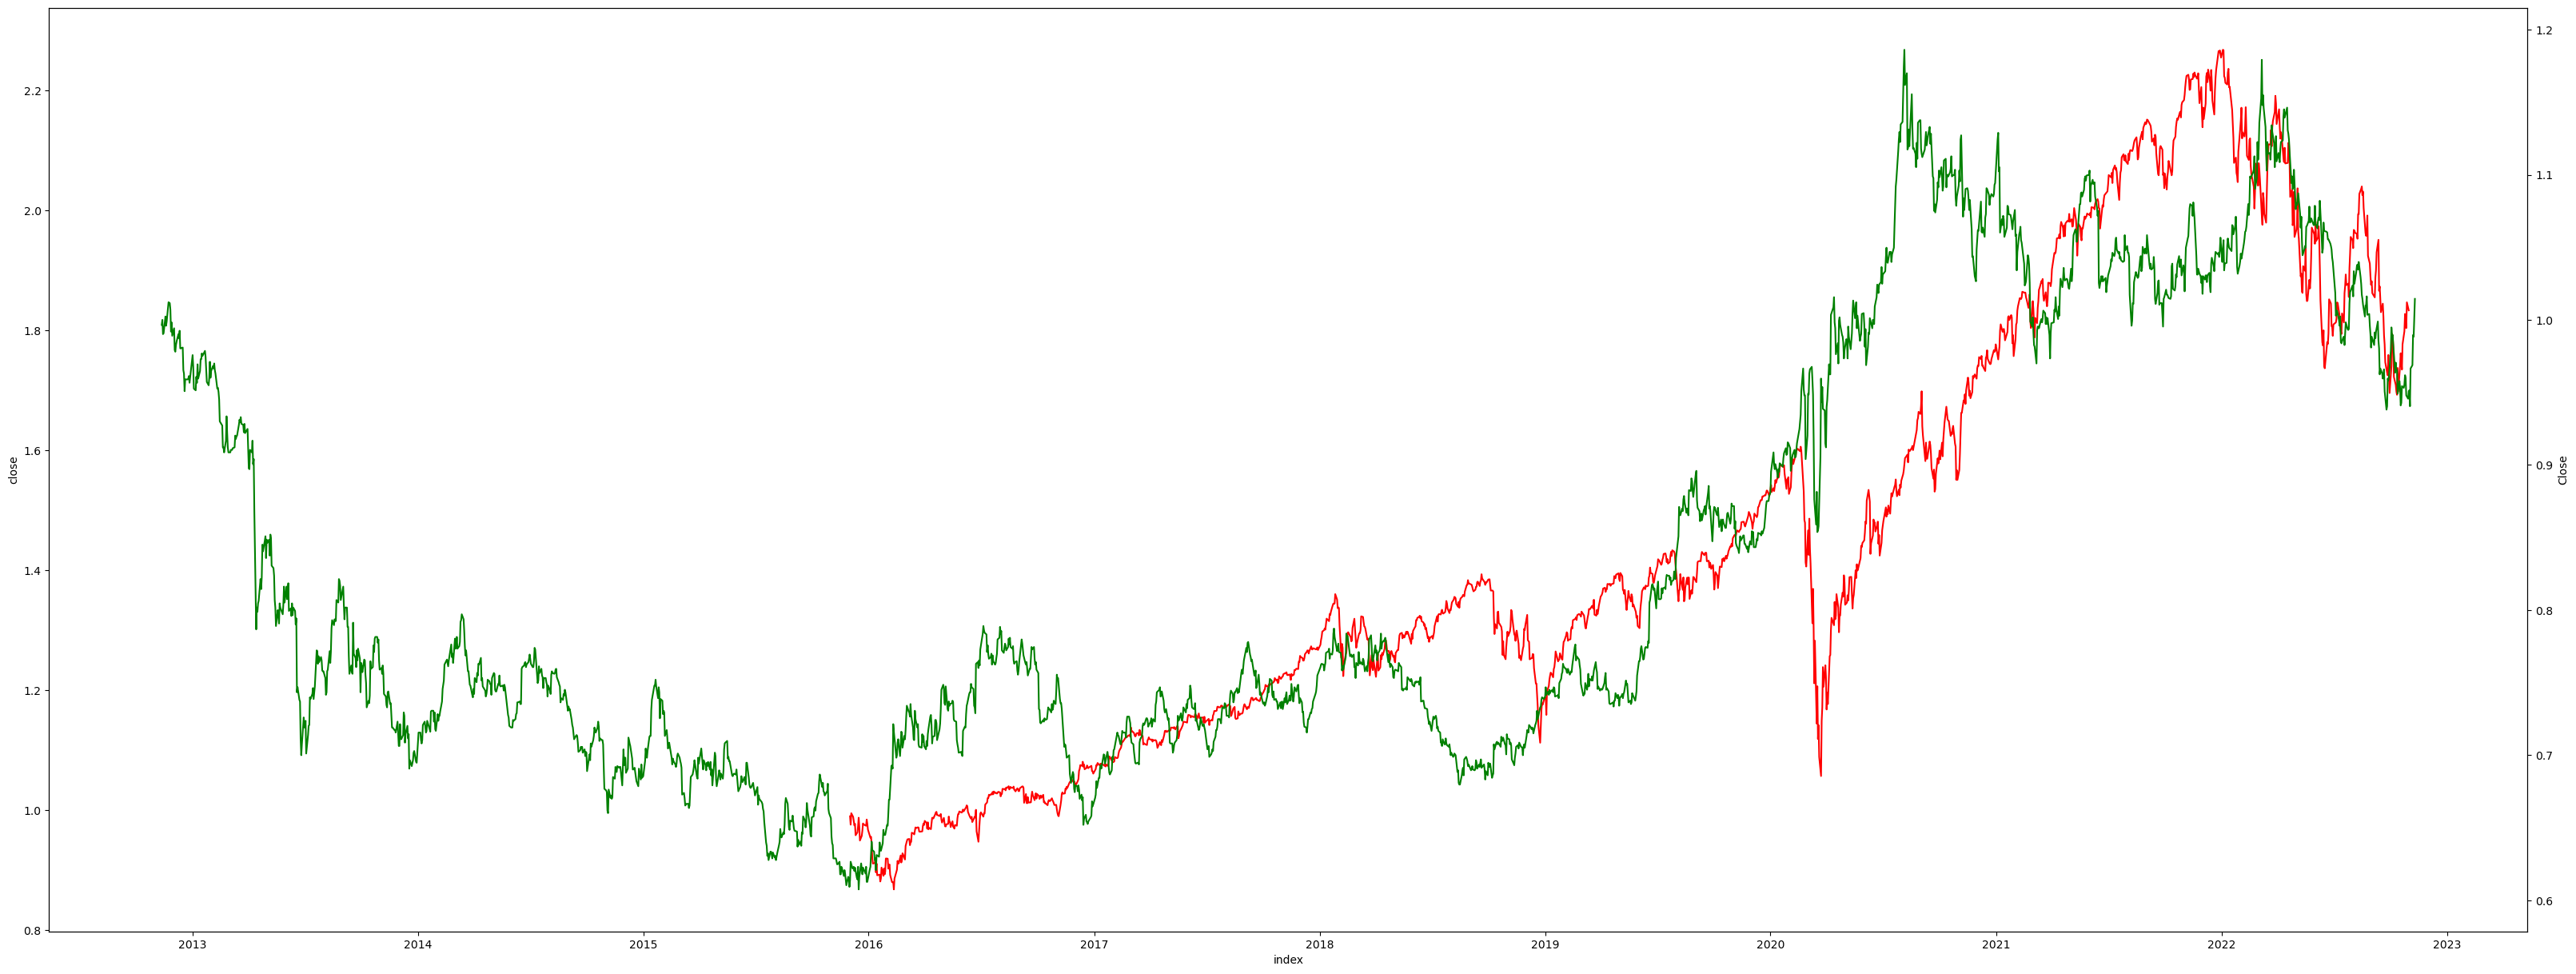

In [70]:
# Combine aggergated plots

fig,ax = plt.subplots(figsize=(40,15))
ax.plot(SPY_agg.index, SPY_agg.close, color='red')
ax.set_xlabel('index')
ax.set_ylabel('close')
ax2 = ax.twinx()
ax2.plot(gold_agg.index, gold_agg.Close, color='green')
ax2.set_ylabel('Close')